# Homework #1
**Stu. name:** Seyed Mohammad Amin Dadgar <br>
**Stu. id:** 4003624016

**Used Tools and Libraries**

**Numpy:** NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays. (https://numpy.org/)

**Matplotlib**:
Matplotlib is a plotting library for the Python programming language and its numerical mathematics extension NumPy. It provides an object-oriented API for embedding plots into applications using general-purpose GUI toolkits like Tkinter, wxPython, Qt, or GTK. (https://matplotlib.org/)    

*Note:* The libraries description is copied from https://www.wikipedia.org/.

# Fuzzy sets and related topics

## Ex 2. 
Question 2 of the second chapter of Zimmermann, 4th ed, 2001 book

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def find_alpha_cuts(A_tilda, **kwargs):
    """
    Find all the alpha-cuts of a fuzzy set
    
    Parameters:
    ------------
    A_tilda : array of tuples
        The fuzzy set that we are trying to find its alpha cuts
    kwargs -> interval : Floating number between `0` and `1`
        the alpha-cuts computed from intervals, example `0.25` have five alpha-cuts `0`, `0.25`, `0.5`, `0.75`, `1`
        Note: `0` and `1` are excluded!
        default is `-1`
    kwargs -> alpha_cuts : array_like
        if alpha_cuts are sent as input, the intervals variable would be omited
        An array of floating points between `0` and `1`, default is None
    
    **Important**: one of interval or alpha_cuts should be sent as input, otherwise an error would be raised!
        
    Returns:
    --------
    alpha_cuts : dictionary
        a python dictionary with key of alpha-cuts and values
    strong_alpha_cuts : dictionary
        a python dictionary with key of alpha-cuts and values
    """
    ## create dictionaries to save later
    alpha_cuts = {}
    alpha_cuts_strong = {}
    
    ## intialize the variable
    alpha_cuts_interval = []
        
    if 'interval' in kwargs:
        alpha_cuts_interval = np.arange(0, 1, kwargs['interval'])
    elif 'alpha_cuts' in kwargs:
        alpha_cuts_interval = kwargs['alpha_cuts']
    else:
        raise "Error: One of the interval or alpha_cuts variable must have a value! (Not both either)" 
        
    ## for each alpha-cut
    ## step is alpha-cut in each iteration
    for step in alpha_cuts_interval:
        ## choose the values of the alpha-cut
        values = A_tilda[A_tilda[:, 1] >= step]
        
        ## choose the values of strong alpha-cuts
        strong_values = A_tilda[A_tilda[:, 1] > step]
    
        ## save the alpha-cut set with the key of alpha-cut value
        alpha_cuts[step] = values
        alpha_cuts_strong[step] = strong_values
        
    ## the loop does not find the alpha-cut = 1
    ## alpha-cut = 1 is actually the whole set!
    alpha_cuts[1.0] = A_tilda[A_tilda[:, 1] == 1]
        
    return alpha_cuts, alpha_cuts_strong

In [3]:
def plot_scatter_alpha_cuts(alpha_cut_set):
    """
    Plot the level sets of alpha cuts, using scatter plot
    
    Parameters:
    ----------
    alpha_cut_set : fictionary
        a dictionary of alpha_cuts related to a fuzzy set
        
    """
    
    keys = alpha_cut_set.keys()
    ## initialize an array to plot the data
    plot_data = []
    
    ## create the (x,y) array to plot the data
    for step in keys:
        ## find the values with membeship value equal to step
        value = alpha_cut_set[step]
        value = value[:, 0]
        ## get the values count for each alpha levels
        values_count = len(value)
        
        ## create an array of x_values and their alpha set
        alpha_level = np.full(values_count, step)
        data = np.stack((value, alpha_level), axis=1)
        ## the y value is actually the alphas
        plot_data.append(data)
    
    ## convert to a numpy array
    plot_data = np.array(plot_data, dtype=object)
    
    ## create x and y array to save the y_ticks
    y_ticks = []
    x_ticks = []
    for data in plot_data:
        X = data[:, 0]
        Y = data[:, 1]
        
        y_ticks = np.append(y_ticks, Y)
        x_ticks = np.append(x_ticks, X)
        plt.scatter(X, Y)
    
    plt.xticks(x_ticks)
    plt.yticks(y_ticks)
    plt.show()

### Part (a)

In [4]:
A = np.array([[3, 1], [4, 0.2], [5, 0.3], [6, 0.4], 
                  [7, 0.6], [8, 0.8], [10, 1], [12, 0.8], [14, 0.6] ])
A_alpha_cuts_set, A_strong_alpha_cuts_set = find_alpha_cuts(A, interval=0.25)

To see how it works we just print one of the alpha-cuts set once.

In [5]:
A_alpha_cuts_set

{0.0: array([[ 3. ,  1. ],
        [ 4. ,  0.2],
        [ 5. ,  0.3],
        [ 6. ,  0.4],
        [ 7. ,  0.6],
        [ 8. ,  0.8],
        [10. ,  1. ],
        [12. ,  0.8],
        [14. ,  0.6]]),
 0.25: array([[ 3. ,  1. ],
        [ 5. ,  0.3],
        [ 6. ,  0.4],
        [ 7. ,  0.6],
        [ 8. ,  0.8],
        [10. ,  1. ],
        [12. ,  0.8],
        [14. ,  0.6]]),
 0.5: array([[ 3. ,  1. ],
        [ 7. ,  0.6],
        [ 8. ,  0.8],
        [10. ,  1. ],
        [12. ,  0.8],
        [14. ,  0.6]]),
 0.75: array([[ 3. ,  1. ],
        [ 8. ,  0.8],
        [10. ,  1. ],
        [12. ,  0.8]]),
 1.0: array([[ 3.,  1.],
        [10.,  1.]])}

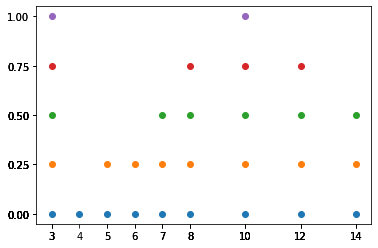

In [6]:
plot_scatter_alpha_cuts(A_alpha_cuts_set)

**Question 3 Answer**: With this alpha levels we can see that $\tilde{A}$ is *not convex*. The reason is for $\alpha = 1$ there is no value for $4,5,6,8$ and $8$.

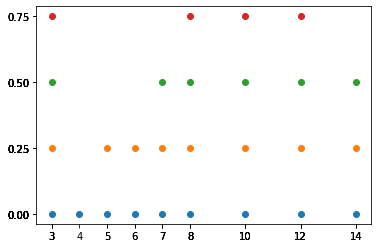

In [7]:
plot_scatter_alpha_cuts(A_strong_alpha_cuts_set)

Because our values for $\tilde{A}$ was discrete we plotted scatter plot for it.

### Part (b)
\begin{equation}
\tilde{B} = {(x, \mu_{\tilde{B}}(x) = (1+(x-10)^2)^{-1})} \\
\text{for } \alpha = 0.3, 0.5, 0.8
\end{equation}

In [8]:
def mu_B(x , normalize = True):
    """
    calculating the membership function for \tilde{B}
    
    Parameters:
    -----------
    x : array_like
        array of numerics
    normalize : boolean
        normalize the membership values, default is True
    
    Returns:
    --------
    x_tilda : array of tuples
        the fuzzy set
        an array composed by values and normalized fuzzy membership values
    """
    
    membership_value = 1 + 1 / np.power(x - 10, 2)
    ## replace the infinities to zero
    ## computed by dividing with zero
    membership_value = np.where(membership_value == np.inf, 0, membership_value)
    
    ## normalize
    membership_value = normalize_membership(membership_value)
    
    
    x_tilda = np.stack((x, membership_value), axis=1)

    return x_tilda
def normalize_membership(membership_values):
    """
    normalize the values of membership function of a fuzzy set to [0, 1]
    
    Parameters:
    ------------
    membership_values : array_like
        membership values for a fuzzy set
        
    Returns:
    ---------
    membership_normalized : array_like
        membership values of a fuzzy set normalized to the interval [0, 1]
    """
    assert (membership_values >= 0).all(), "Error: all the membership values must be positive!"
    
    ## normalize
    membership_normalized = membership_values / max(membership_values)
    
    return membership_normalized

In [9]:
x = np.arange(1, 15)
B_tilde = mu_B(x)
B_tilde

<ipython-input-8-08f9839dfa94>:19: RuntimeWarning: divide by zero encountered in true_divide
  membership_value = 1 + 1 / np.power(x - 10, 2)


array([[ 1.        ,  0.50617284],
       [ 2.        ,  0.5078125 ],
       [ 3.        ,  0.51020408],
       [ 4.        ,  0.51388889],
       [ 5.        ,  0.52      ],
       [ 6.        ,  0.53125   ],
       [ 7.        ,  0.55555556],
       [ 8.        ,  0.625     ],
       [ 9.        ,  1.        ],
       [10.        ,  0.        ],
       [11.        ,  1.        ],
       [12.        ,  0.625     ],
       [13.        ,  0.55555556],
       [14.        ,  0.53125   ]])

In [10]:
B_alpha_cuts_set, B_strong_alpha_cuts_set = find_alpha_cuts(B_tilde, alpha_cuts=[0.3, 0.5, 0.8])

Again our values for $\tilde{B}$ is discrete, so we plot a scatter plot for it.

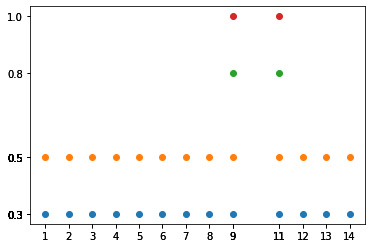

In [11]:
plot_scatter_alpha_cuts(B_alpha_cuts_set)

**Question 3 Answer**: With this alpha levels we can see that $\tilde{B}$ is *convex*!

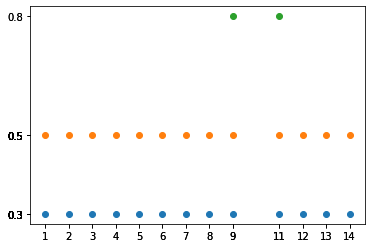

In [12]:
plot_scatter_alpha_cuts(B_strong_alpha_cuts_set)

### Part (c)
\begin{equation}
\tilde{C} = {\{x, \mu_{\tilde{C}}(x)\}} \\
\mu_{\tilde{C}} = 0 \text{ for } x \leq 10 \\
\mu_{\tilde{C}} = (1+(x-10)^2)^{-1}) \text{ for } x>10
\end{equation}

In [13]:
def mu_C(x , normalize = True):
    """
    calculating the membership function for \tilde{C}
    
    Parameters:
    -----------
    x : array_like
        array of numerics
    normalize : boolean
        normalize the membership values, default is True
    
    Returns:
    --------
    x_tilda : array of tuples
        the fuzzy set
        an array composed by values and normalized fuzzy membership values
    """
    
    membership_value = 1 + 1 / np.power(x - 10, 2)
    ## replace the infinities to zero
    ## computed by dividing with zero
    membership_value = np.where(membership_value == np.inf, 0, membership_value)
    
    ## apply the other condition that all the values less equal than 10 have zero membership
    membership_value = np.where(x <= 10, 0, membership_value)

    
    ## normalize
    membership_value = normalize_membership(membership_value)
    
    
    x_tilda = np.stack((x, membership_value), axis=1)

    return x_tilda

In [14]:
C = np.arange(0, 25)
C_tilde = mu_C(C)
C_tilde

<ipython-input-13-ab647626a7f3>:19: RuntimeWarning: divide by zero encountered in true_divide
  membership_value = 1 + 1 / np.power(x - 10, 2)


array([[ 0.        ,  0.        ],
       [ 1.        ,  0.        ],
       [ 2.        ,  0.        ],
       [ 3.        ,  0.        ],
       [ 4.        ,  0.        ],
       [ 5.        ,  0.        ],
       [ 6.        ,  0.        ],
       [ 7.        ,  0.        ],
       [ 8.        ,  0.        ],
       [ 9.        ,  0.        ],
       [10.        ,  0.        ],
       [11.        ,  1.        ],
       [12.        ,  0.625     ],
       [13.        ,  0.55555556],
       [14.        ,  0.53125   ],
       [15.        ,  0.52      ],
       [16.        ,  0.51388889],
       [17.        ,  0.51020408],
       [18.        ,  0.5078125 ],
       [19.        ,  0.50617284],
       [20.        ,  0.505     ],
       [21.        ,  0.50413223],
       [22.        ,  0.50347222],
       [23.        ,  0.50295858],
       [24.        ,  0.50255102]])

In [15]:
C_alpha_cuts_set, C_strong_alpha_cuts_set = find_alpha_cuts(C_tilde, interval = 0.25)

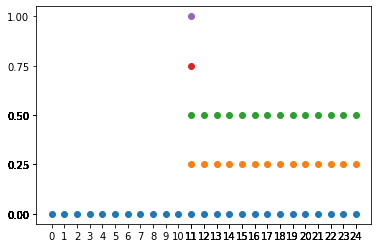

In [16]:
plot_scatter_alpha_cuts(C_alpha_cuts_set)

**Question 3 Answer**: With this alpha levels we can see that $\tilde{C}$ is *convex*!

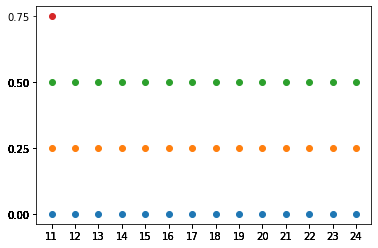

In [17]:
plot_scatter_alpha_cuts(C_strong_alpha_cuts_set)

## Ex 3. 
Question 3 of the second chapter of Zimmermann, 4th ed, 2001 book

The answers for this question is added in above cells.

## Ex 4. 
Answer to the question 2 of chapter 4 from the book Ross, 4th ed. 2017.

To answer this question we need to write some equations.
first we know that the equation below is correct.
\begin{equation}
r \leq \lambda r + (1 - \lambda) s \leq s \\
\text{OR} \\
s \leq \lambda s + (1 - \lambda) r \leq r \\
\end{equation}
This means that each $\lambda r + (1 - \lambda) s$ is between r and s, and because our fuzzy set is convex we can assign the equation below to it
\begin{equation}
\mu_{\tilde{A}}[r] \leq \mu_{\tilde{A}}[\lambda r + (1 - \lambda) s] \leq \mu_{\tilde{A}}[s] \\
\text{OR} \\
\mu_{\tilde{A}}[s] \leq \mu_{\tilde{A}}[\lambda s + (1 - \lambda) r] \leq \mu_{\tilde{A}}[r]
\end{equation}
So using the equation above we can say that the term $\lambda r + (1 - \lambda) s$, is always greater equal than minimum of $\mu_{\tilde{A}}(r),\mu_{\tilde{A}}(s)$. And we can write the equation
\begin{equation}
\mu_{\tilde{A}}[\lambda s + (1 - \lambda) r] \geq min[\mu_{\tilde{A}}(r),\mu_{\tilde{A}}(s)]
\end{equation}

## Ex 5. 
Question 4 of the second chapter of Zimmermann, 4th ed, 2001 book

In [18]:
def find_cardinality(fuzzy_set):
    """
    Find the cardinality of a fuzzy set 
    
    Parameters:
    -----------
    fuzzy_set : array of tuples
        the fuzzy set is an array of tuples
        
    Returns:
    ---------
    cardinality : float
        the calculated cardinality of a fuzzy set
    """
    ## the second item in each dimension is the membership function value
    cardinality = np.sum(fuzzy_set[:, 1])
    return cardinality

def find_relative_cardinality(fuzzy_set, whole_set):
    """
    Find the relative cardinality value for the fuzzy set
    
    Parameters:
    -----------
    fuzzy_set : array of tuples
        the fuzzy set is an array of tuples
    whole_set : array of tuples
        the whole set we are calculating the fuzzy set relative cardinality with respect to it
        
    Returns:
    ---------
    cardinality : float
        the calculated cardinality of a fuzzy set
    
    """
    
    cardinality = np.sum(fuzzy_set[:, 1])
    ## the whole set is a set with all membership values equal to one
    whole_set_cardinality = len(whole_set)
    
    return cardinality / whole_set_cardinality

def find_fuzziness(fuzzy_set, **kwargs):
    """
    Find how much a fuzzy set is fuzzy
    
    Parameters:
    -----------
    fuzzy_set : array of tuples
        the fuzzy set is an array of tuples
    **kwargs : metrics
        entropy : find the fuzziness value using entropy metric, the value sent here would be used as K in entropy equation
        distance : find the fuzziness value using minkowski, the value sent here is used as p in the equation
        
    Returns:
    ---------
    fuzziness : array_like
        if both metrics was requested an array is sent as input (entropy, distance)
        else a floating point is returned
    """
    ###### METHOD SELECTION ######
    
    ## the method is chosen using the kwargs
    ## if both was chosen find both values
    ## if nothing was sent as kwargs entropy would be used as default
    method = ''
    if 'entropy' in kwargs and 'distance' in kwargs:
        method = 'entropy & distance'
    elif 'entropy' in kwargs:
        method = 'entropy'
    elif 'distance' in kwargs:
        method = 'distance'
    else:
        ## default if nothing was entered
        method = 'entropy'
        
    
    ###### Calculate the requested metrics ######
    if method == 'entropy':
        K = kwargs['entropy']
        K = int(K)
        entropy = find_entropy(fuzzy_set, K)
        
        print(f'Fuzziness entropy: {entropy}')
        
        fuzziness = entropy 
        
    elif method == 'entropy & distance':
        K = kwargs['entropy']
        K = int(K)
        entropy = find_entropy(fuzzy_set, K)
        
        p = kwargs['distance']
        p = int(p)
        minkowski = find_minkowski(fuzzy_set, p)
        distance = find_distance(fuzzy_set, minkowski)
        
        print(f'Fuzziness entropy with K={K}: {entropy}')
        print(f'Fuzziness Minkowski with p={p}: {distance}')
        
        fuzziness = [entropy, distance]
        
    elif method == 'distance':
        p = kwargs['distance']
        p = int(p)
        minkowski = find_minkowski(fuzzy_set, p)
        distance = find_distance(fuzzy_set, minkowski)
        
        print(f'Fuzziness Minkowski with p={p}: {distance}')
        
        fuzziness = distance
        
    return fuzziness
        

def find_distance(fuzzy_set, minkowski):
    """
    find the distance using the minkowski metric
    
    Parameters:
    -----------
    fuzzy_set : array of tuples
        the fuzzy set is an array of tuples
    minkowski : float
        the minkowski calculated distance
    
    Returns:
    --------
    distance : float
        distance calculated using minkowski metric
    """
    ## support size is the count of non-zero membership function values
    support_set_size = len(fuzzy_set[fuzzy_set[:, 1] != 0])
    
    distance = 1 - (minkowski / support_set_size)
    
    return distance
    
def find_entropy(fuzzy_set, K):
    """
    find the entropy value for a fuzzy set
    
    Parameters:
    -----------
    fuzzy_set : array of tuples
        the fuzzy set is an array of tuples
    K : float
        the hyperparameter to set
        
    Returns:
    ---------
    entropy : float
        the value of entropy
    """
    ## extract the mu values from the fuzzy set
    mu = fuzzy_set[:, 1]
    log_mu = np.log(mu)
    
    ## find the element wise multiply  
    values = np.multiply(mu, log_mu)
    entropy = -K * np.sum(values)
    
    return entropy

def find_minkowski(fuzzy_set, p):
    """
    find the minkowski distance, using the complement of the set
    
    Parameters:
    -----------
    fuzzy_set : array of tuples
        the fuzzy set is an array of tuples
    p : float
        the hyperparameter to set for the function
        
    Returns:
    ---------
    minkowski : float
        the minkowski distance
    """
    ## extract the mu values from the fuzzy set
    mu = fuzzy_set[:, 1]
    ## the complement of the set membership values
    mu_C = 1 - mu
    
    ## differenc of both
    diff = abs(mu - mu_C)
    ## element-wise power
    diff = np.power(diff, p)
    
    value = np.sum(diff)
    
    ## again another power is needed
    minkowski = np.power(value, 1/p)
    
    return minkowski

### Part (a)

In [19]:
A_tilde = np.array([[3, 1], [4, 0.2], [5, 0.3], [6, 0.4], 
                  [7, 0.6], [8, 0.8], [10, 1], [12, 0.8], [14, 0.6] ])
## X is our whole set
X = np.arange(1, 11)

In [20]:
find_cardinality(A_tilde)

5.699999999999999

In [21]:
find_relative_cardinality(A_tilde, X)

0.57

In [22]:
find_fuzziness(A_tilde, entropy=1, distance = 2)

Fuzziness entropy with K=1: 2.0196161471561873
Fuzziness Minkowski with p=2: 0.7963299691130737


[2.0196161471561873, 0.7963299691130737]

### Part (b)

In [23]:
B_tilde = np.array([[2, 0.4], [3, 0.6], [4, 0.8], [5, 1],
                    [6, 0.8], [7, 0.6], [8, 0.4]])

In [24]:
find_cardinality(B_tilde)

4.6

In [25]:
find_relative_cardinality(B_tilde, X)

0.45999999999999996

In [26]:
find_fuzziness(B_tilde, entropy=1, distance = 2)

Fuzziness entropy with K=1: 1.7030530161212485
Fuzziness Minkowski with p=2: 0.8041241542742559


[1.7030530161212485, 0.8041241542742559]

### Part (c)

In [27]:
C_tilde = np.array([[2, 0.4], [4, 0.8], [5, 1], [7, 0.6]])

In [28]:
find_cardinality(C_tilde)

2.8000000000000003

In [29]:
find_relative_cardinality(C_tilde, X)

0.28

In [30]:
find_fuzziness(C_tilde, entropy=1, distance = 2)

Fuzziness entropy with K=1: 0.8515265080606242
Fuzziness Minkowski with p=2: 0.7


[0.8515265080606242, 0.7]

# Fuzzy Operations

## Question 2, chapter 2, Ross, 4th ed. 2017

The tensile strenghts are as
\begin{equation}
\tilde{A} = \{(1, 0.4), (2, 0.35), (3 , 0.5), (4, 0.6)\} \\
\tilde{B} = \{(1, 0.7), (2, 0.75), (3 , 0.65), (4, 0.8)\} 
\end{equation}

### Part (a)
\begin{equation}
\tilde{A} \cap \tilde{B}
\end{equation}
We know that intersect of a fuzzy set, return the minimum membership values from both sets, so the answer is
\begin{equation}
\tilde{A} \cap \tilde{B} = \{(1, 0.4), (2, 0.35), (3 , 0.5), (4, 0.6)\} 
\end{equation}

### Part (b)
\begin{equation}
\tilde{A} \cup \tilde{B}
\end{equation}
And for union the membership for values is the maximum membership value of the both sets.

\begin{equation}
\tilde{A} \cup \tilde{B} =\{(1, 0.7), (2, 0.75), (3 , 0.65), (4, 0.8)\}
\end{equation}

### Part (c)
TODO

### Part (d)
\begin{equation}
\tilde{A} - \tilde{B}
\end{equation}
First we need to convert minus into intersect
\begin{equation}
\tilde{A} - \tilde{B} = \tilde{A} \cap \neg\tilde{B}
\end{equation}
Then it's easy to find the answer, first we calculate $\neg\tilde{B}$ and then we calculate the intersect with $\tilde{A}$.

So $\neg\tilde{B}$ can be written as
\begin{equation}
\neg\tilde{B} = \{(1, 0.3), (2, 0.25), (3 , 0.65), (4, 0.8)\} 
\end{equation}
And the intersection of $\tilde{A}$ with $\neg\tilde{B}$ is the minimum membership functions of both sets.
\begin{equation}
\tilde{A} \cap \neg\tilde{B} = \{(1, 0.3), (2, 0.25), (3 , 0.35), (4, 0.2)\} = \tilde{A} - \tilde{B}
\end{equation}

## Ex 6. 
Answer to the question 8, chapter 2 from the book Ross, 4th ed. 2017

In [31]:
def membership(x, mu, sigma):
    """
    membership function to calculate membership values for x, with mu and sigma parameters
    
    Parameters:
    -----------
    x : array_like
        set of numeric values
    mu, sigma : integer
        hyperparameters for membership function
        
    Returns:
    --------
    fuzzy_set : array_like
        an array of tuples representing the fuzzy set
    """
    ## find the membership values
    memberships = np.exp(-((x-mu)**2)/ (2* sigma **2) )
    fuzzy_set = np.stack((x, memberships), axis=1 )
    
    return fuzzy_set

In [32]:
X = np.arange(0, 11)
A_tilde = membership(X, 4, 2)
B_tilde = membership(X, 8, 2)

In [33]:
A_tilde

array([[ 0.        ,  0.13533528],
       [ 1.        ,  0.32465247],
       [ 2.        ,  0.60653066],
       [ 3.        ,  0.8824969 ],
       [ 4.        ,  1.        ],
       [ 5.        ,  0.8824969 ],
       [ 6.        ,  0.60653066],
       [ 7.        ,  0.32465247],
       [ 8.        ,  0.13533528],
       [ 9.        ,  0.04393693],
       [10.        ,  0.011109  ]])

In [34]:
B_tilde

array([[0.00000000e+00, 3.35462628e-04],
       [1.00000000e+00, 2.18749112e-03],
       [2.00000000e+00, 1.11089965e-02],
       [3.00000000e+00, 4.39369336e-02],
       [4.00000000e+00, 1.35335283e-01],
       [5.00000000e+00, 3.24652467e-01],
       [6.00000000e+00, 6.06530660e-01],
       [7.00000000e+00, 8.82496903e-01],
       [8.00000000e+00, 1.00000000e+00],
       [9.00000000e+00, 8.82496903e-01],
       [1.00000000e+01, 6.06530660e-01]])

In [35]:
def intersect_fuzzy(A_tilde, B_tilde):
    """
    Intersect two fuzzy sets
    A intersect B
    
    Parameters:
    -----------
    A_tilde : array of tuples
        the first fuzzy set
    B_tilde : array of tuples
        the second fuzzy set
        
    Returns:
    --------
    fuzzy_set : array of tuples
        the result of A_tilde intersect B_tilde
    """
    fuzzy_set = []
    for value in A_tilde[:, 0]:
        ## get the memberships for each value
        A_var = A_tilde[A_tilde[:, 0] == value][0, 1]
        B_var = A_tilde[A_tilde[:, 0] == value][0, 1]
        
        fuzzy_set.append([value, min(A_var, B_var)])
    return fuzzy_set

def union_fuzzy(A_tilde, B_tilde):
    """
    union two fuzzy sets
    A union B
    
    Parameters:
    -----------
    A_tilde : array of tuples
        the first fuzzy set
    B_tilde : array of tuples
        the second fuzzy set
        
    Returns:
    --------
    fuzzy_set : array of tuples
        the result of A_tilde union B_tilde
    """
    fuzzy_set = []
    for value in A_tilde[:, 0]:
        ## get the memberships for each value
        A_var = A_tilde[A_tilde[:, 0] == value][0, 1]
        B_var = A_tilde[A_tilde[:, 0] == value][0, 1]
        
        fuzzy_set.append([value, max(A_var, B_var)])
    return fuzzy_set

def complement_fuzzy(A_tilde):
    """
    complement of a fuzzy sets
    return not A
    
    Parameters:
    -----------
    A_tilde : array of tuples
        the fuzzy set to be complemented
        
    Returns:
    --------
    fuzzy_set : array of tuples
        the result of not A_tilde
    """
    memberships = 1 - A_tilde[:, 1]
    fuzzy_set = np.stack((A_tilde[:, 0], memberships), axis = 1)
    return fuzzy_set

def difference_fuzzy(A_tilde, B_tilde):
    """
    find the difference between two fuzzy sets
    A - B
    
    Parameters:
    -----------
    A_tilde : array of tuples
        the first fuzzy set
    B_tilde : array of tuples
        the second fuzzy set
        
    Returns:
    --------
    fuzzy_set : array of tuples
        the result of A_tilde - B_tilde
    """
    ## A - B is equal to A intersect not B
    
    not_B_tilde = complement_fuzzy(B_tilde)
    fuzzy_set = intersect_fuzzy(A_tilde, not_B_tilde)
    return fuzzy_set

In [36]:
intersect_fuzzy(A_tilde, B_tilde)

[[0.0, 0.1353352832366127],
 [1.0, 0.32465246735834974],
 [2.0, 0.6065306597126334],
 [3.0, 0.8824969025845955],
 [4.0, 1.0],
 [5.0, 0.8824969025845955],
 [6.0, 0.6065306597126334],
 [7.0, 0.32465246735834974],
 [8.0, 0.1353352832366127],
 [9.0, 0.04393693362340742],
 [10.0, 0.011108996538242306]]

In [37]:
complement_fuzzy(A_tilde)

array([[ 0.        ,  0.86466472],
       [ 1.        ,  0.67534753],
       [ 2.        ,  0.39346934],
       [ 3.        ,  0.1175031 ],
       [ 4.        ,  0.        ],
       [ 5.        ,  0.1175031 ],
       [ 6.        ,  0.39346934],
       [ 7.        ,  0.67534753],
       [ 8.        ,  0.86466472],
       [ 9.        ,  0.95606307],
       [10.        ,  0.988891  ]])

In [38]:
difference_fuzzy(A_tilde, B_tilde)

[[0.0, 0.1353352832366127],
 [1.0, 0.32465246735834974],
 [2.0, 0.6065306597126334],
 [3.0, 0.8824969025845955],
 [4.0, 1.0],
 [5.0, 0.8824969025845955],
 [6.0, 0.6065306597126334],
 [7.0, 0.32465246735834974],
 [8.0, 0.1353352832366127],
 [9.0, 0.04393693362340742],
 [10.0, 0.011108996538242306]]